<a href="https://colab.research.google.com/github/rohit-1026/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# Understanding Business Problem

Rented Bike sharing systems are a means of renting bike where the process of renting bike and bike return is automated throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on need basis.
The last couple of years has seen a significant rise in the number of bike share companies popping up across in India also, becuase of :


*   Rental bike are Cheaper Than Transit or Car Rental
*   cost-effective
*   It Eliminates the Need for Personal Bike Ownership
*   It’s Healthier Than Driving or Riding Transit
*   Because rental bike sharing is growing ,so availibility of bike at the right time is really important for companies to serve customer. In this project i have dataset of Seoul city (capital of South Korea) . The dataset contain information like weather condition,holiday,date,number of rented bike count,hours. Based on these data i have to predict bikes count at each hour for the stable supply of rental bikes
* ## This dataset contain around 8,760 rows of information and each row contain information like weather condition ,holidays or funtioning days ,count of bike required at particular hour on a particular date.
##Using this dataset i have analyze it and also need to creat machine learning model so that i can predict count of bike required at each hour.

*  ## Understanding business problem is really important ,so till now we understand what is the business problem and also what kind of information we have in our dataset and what we have to predict using machine learning model.






# Importing Libraries and Datasets

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Bike_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Projects/Bike Sharing Demand Prediction/SeoulBikeData.csv', encoding= 'unicode_escape')

# Reading Dataset

In [4]:
#let's see dataframe

Bike_df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


## Copy of Dataframe

In [5]:
#creating copy of dataframe
Bike_df_copy=Bike_df.copy()

In [6]:
#printing all columns/feature
Bike_df_copy.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [7]:
#checking shape of dataframe
Bike_df_copy.shape

(8760, 14)

Our dataset have around 8,760 rows and 14 columns

## Statistical Summary of Data

In [8]:
Bike_df_copy.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [9]:
Bike_df_copy.describe(include = 'all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


From the statical summary we can check mean,maximum,minimum values of each feature

# Pre Processing Of Data

Preprocessing of data is important for highest accuracy of our model.before fitting our data to machine learning model ,it's important that data must be cleaned and also without outlier (if this not done then our model will never learn true pattern of data).If any particular model have some assumption then we also need to take care of these assumption before fitting our data to model . for example in linear regression we have some assumption like (multicollinearity,homodasticity,normally distribution).Let's start pre-processing of data so that we can get highest accuracy in predictions

Before going further it's important to understand about feature of our dataframe and also what type of data each columns contain

## Checking info of Dataframe

In [10]:
#checking info
Bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Most of the feature in our dataframe are numeric type and some are categorical type but "Date" column of our dataframe contain datetime type information but in given data set its data type is object so let's convert datatype of "Date" column. Now let's check for null value/missing value in each column. if there is any null value we will try to replace null value by mean,median or mode.if null value in any column is greater than fourty percent we will drop that particular column from dataset.Treatment of null value is important because it will make our analysis much stronger

In [11]:
#checking null values and sorting in descending order
Bike_df_copy.isnull().sum().sort_values(ascending=True)

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

That's great In our dataset there is no null / missing values

Till now we checked for null/missing value and also datatype of our dataframe columns,Now let's check for outlier.

For a particular feature outlier is basically either very less or either very extreme value compared to all other value to that feature.

Identification of potential outliers is important because ,An outlier may indicate bad data. For example, the data may have been puted incorrectly or an experiment may not have been run correctly

## Checking for outliers

In our dataframe we have some categorical features as well so i am just creating a list of features which are numeric outlier detection ,let's creat box plot for all numeric features

In [12]:
#creating list of numeric features
List_of_numerics=['Rented Bike Count','Temperature(°C)', 'Humidity(%)','Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)','Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

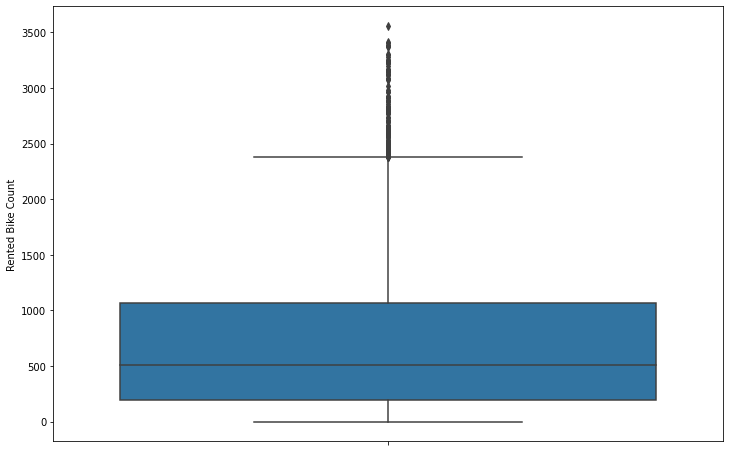

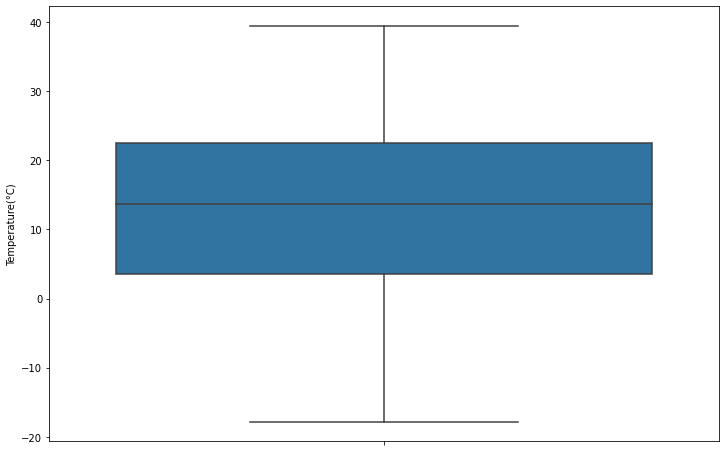

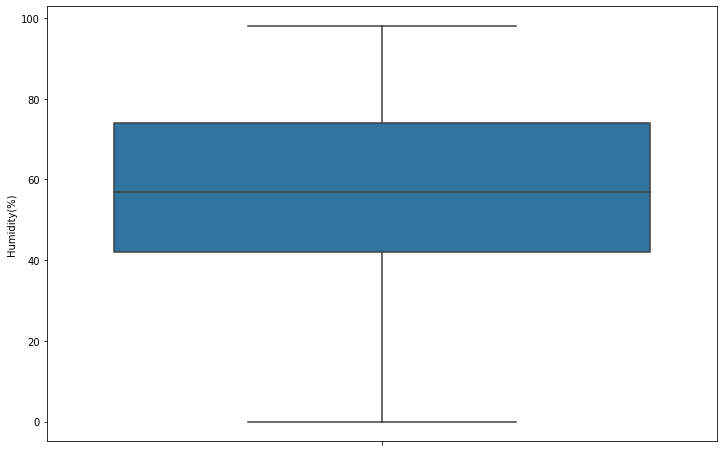

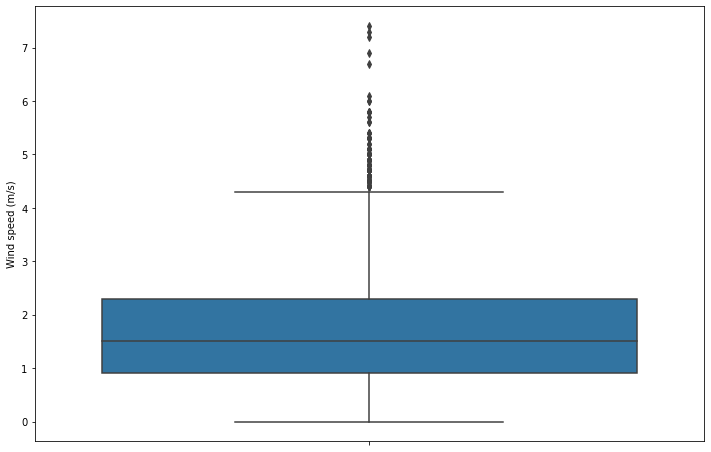

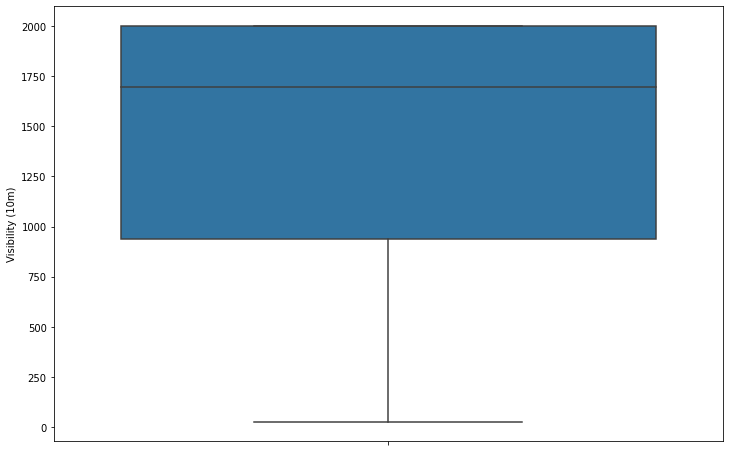

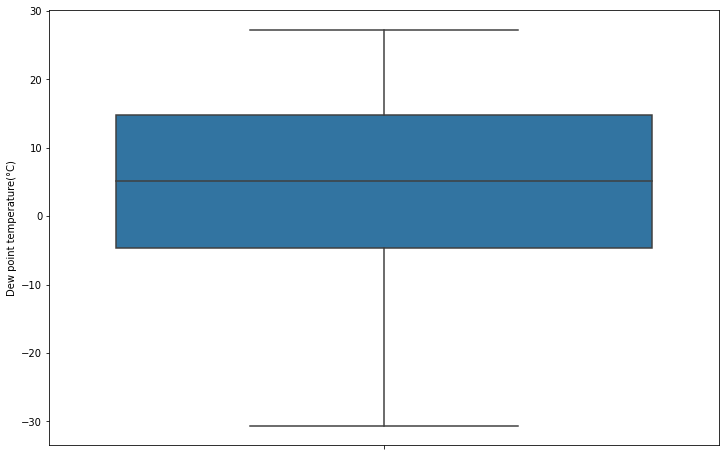

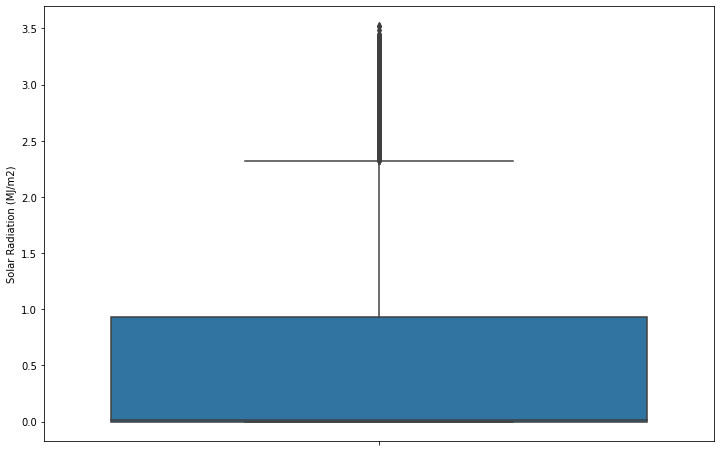

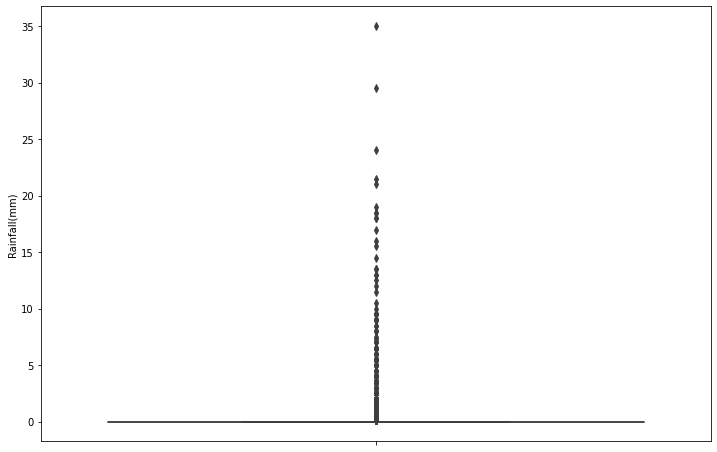

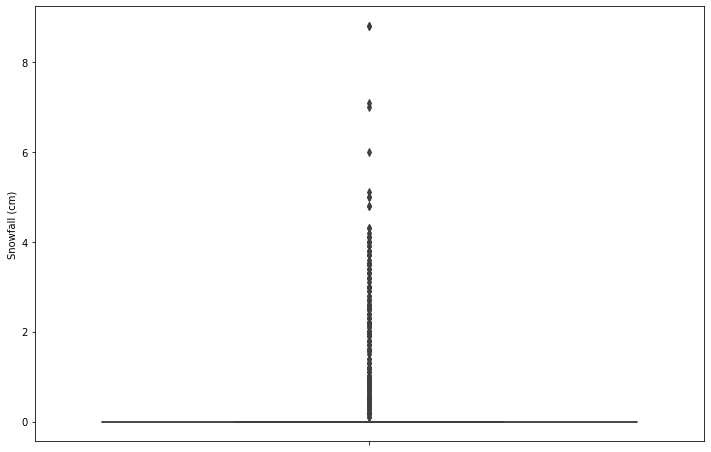

In [13]:
#creating boxplot for outlier detection
for col in List_of_numerics:
  plt.figure(figsize=(12,8))
  sns.boxplot(y=Bike_df_copy[col])

In [14]:
Bike_df_copy.shape

(8760, 14)

In [15]:
#Bike_df_copy = Bike_df_copy[Bike_df_copy['Wind speed (m/s)']<=4.5]
#Bike_df_copy=Bike_df_copy[Bike_df_copy['Solar Radiation (MJ/m2)']<=3]
#Bike_df_copy=Bike_df_copy[Bike_df_copy['Rainfall(mm)']<=15]
#Bike_df_copy=Bike_df_copy[Bike_df_copy['Snowfall (cm)']<=4]

In [16]:
Bike_df_copy.shape

(8760, 14)

In [17]:
Bike_df_copy['Rented Bike Count'].max()

3556

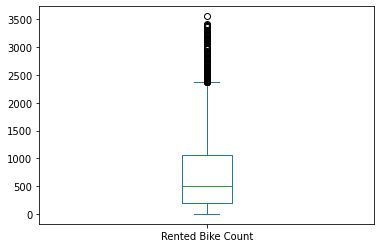

In [18]:
Bike_df_copy['Rented Bike Count'].plot(kind='box')

In [19]:
# Finding Q1, Q3 and IQR
Q1 =  Bike_df_copy['Rented Bike Count'].quantile(0.25) #25%
Q3 = Bike_df_copy['Rented Bike Count'].quantile(0.75) # 75%
IQR = Q3 - Q1

In [20]:
# The outlier values
Bike_df_copy[(Bike_df_copy['Rented Bike Count'] < Q1-1.5*IQR ) | (Bike_df_copy['Rented Bike Count'] > Q3+1.5*IQR)]['Rented Bike Count']

2946    2401
2994    2402
3114    2401
3210    2404
3282    2692
        ... 
7746    2631
7818    2613
7842    2415
7866    2612
7890    2632
Name: Rented Bike Count, Length: 158, dtype: int64

In [21]:
# Count the outlier
Bike_df_copy[(Bike_df_copy['Rented Bike Count'] < Q1-1.5*IQR ) | (Bike_df_copy['Rented Bike Count'] > Q3+1.5*IQR)]['Rented Bike Count'].count()

158

In [22]:
# Remove outliers from our data set
outliers = (Bike_df_copy['Rented Bike Count'] >= Q1 - 1.5 * IQR) & (Bike_df_copy['Rented Bike Count'] <= Q3 + 1.5 *IQR)
Bike_df_copy = Bike_df_copy.loc[outliers]  

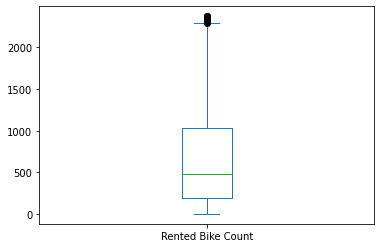

In [23]:
Bike_df_copy['Rented Bike Count'].plot(kind='box')

In [24]:
Bike_df_copy.shape

(8602, 14)

## Converting Date column to date time and extracting Date, Month and Year

In [25]:
#converting datatype of "Date" column
Bike_df_copy['Date']=pd.to_datetime(Bike_df_copy['Date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
#creating three new column /extracting day,month,year from date column
Bike_df_copy['day'] = Bike_df_copy['Date'].dt.day
Bike_df_copy['month'] = Bike_df_copy['Date'].dt.month
Bike_df_copy['year'] = Bike_df_copy['Date'].dt.year
Bike_df_copy['name_of_day'] = Bike_df_copy.Date.dt.day_name()

In [27]:
Bike_df_copy.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day,month,year,name_of_day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday


In [28]:
#dropping date column
Bike_df_copy.drop('Date',axis=1,inplace=True)

In [29]:
#checking values count
Bike_df_copy['Rented Bike Count'].value_counts().reset_index().head(-5)

,index,Rented Bike Count
0,0,295
1,122,19
2,262,19
3,223,19
4,165,18
...,...,...
2014,1439,1
2015,1879,1
2016,2320,1
2017,887,1


In our dataframe we have 295 rows where Rented bike count is 0 ,it's possiable becuase of non Functioning day

# Exploratory data analysis

## Distribution of Features

### Numerical columns

In [30]:
#creating list of numeric features
List_of_numerics=['Rented Bike Count','Temperature(°C)', 'Humidity(%)','Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)','Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

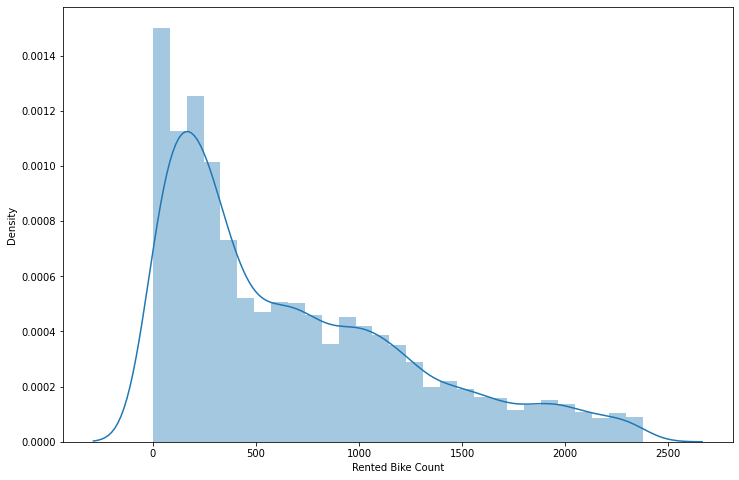

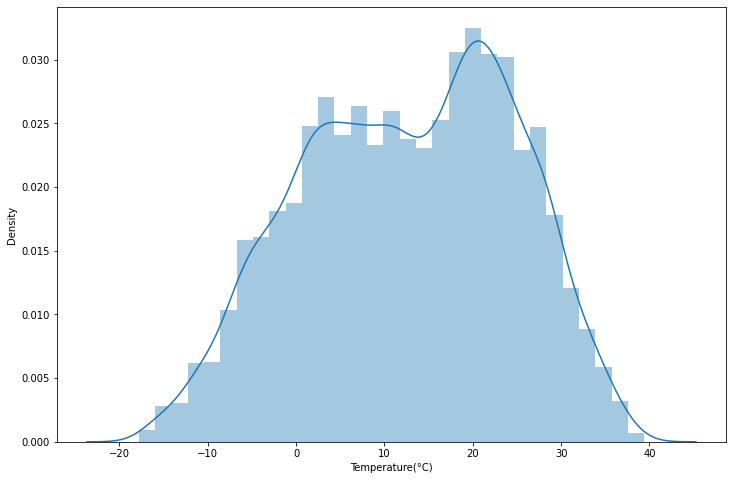

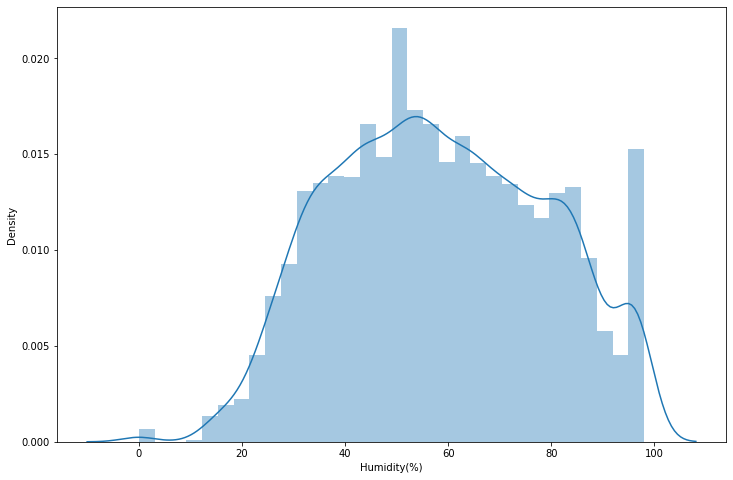

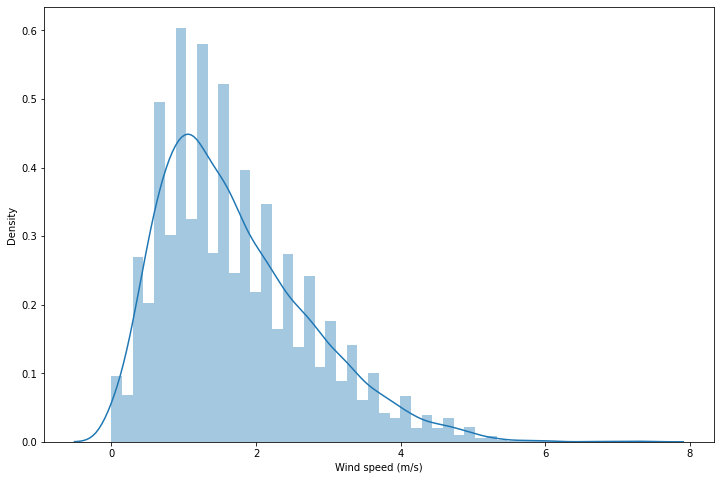

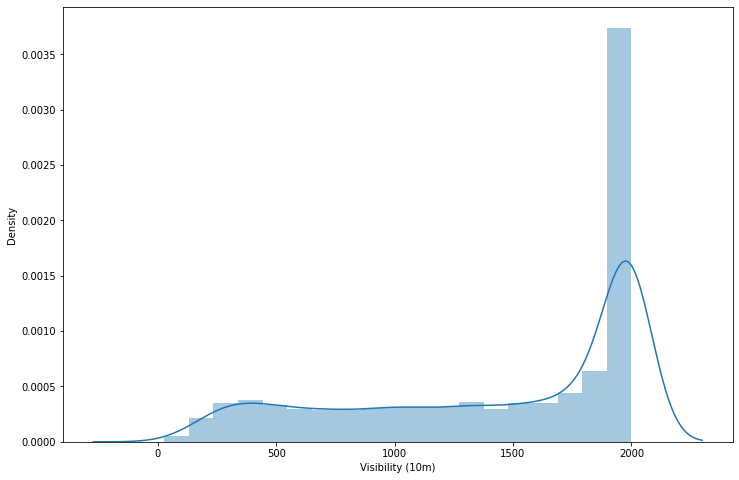

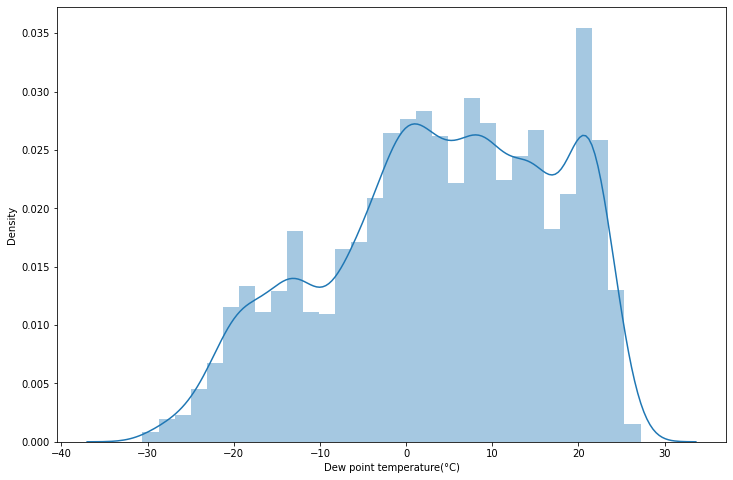

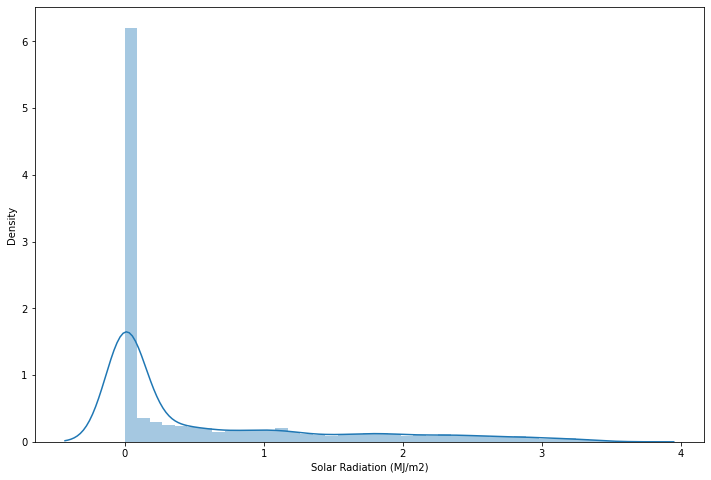

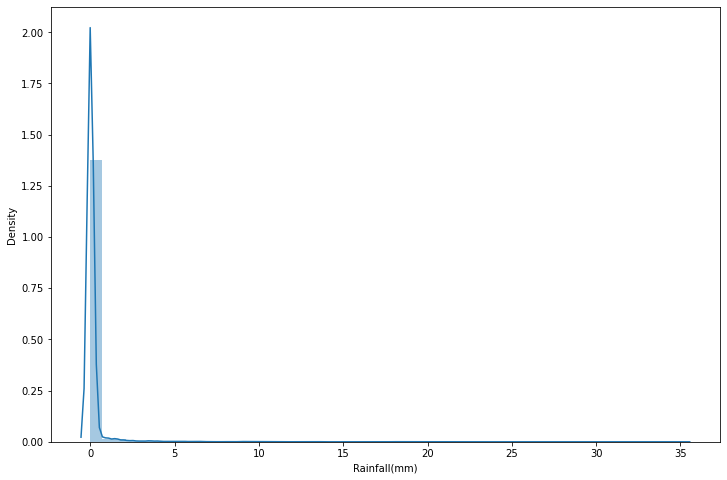

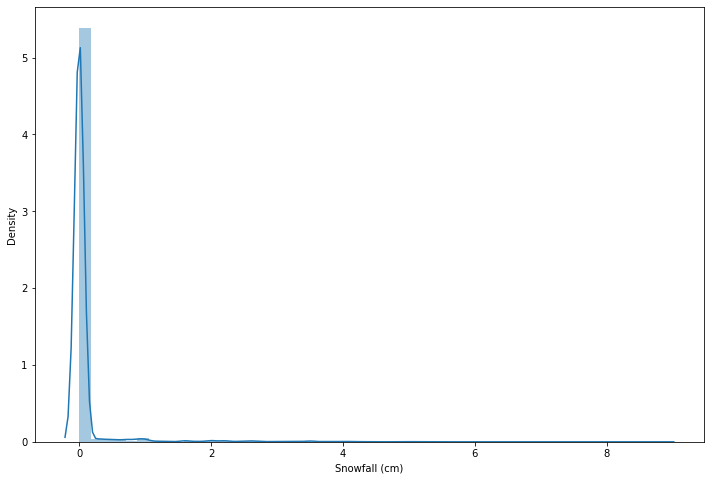

In [31]:
#creating histogram of features
for col in List_of_numerics:
  plt.figure(figsize=(12,8))
  sns.distplot(Bike_df_copy[col])

**insights** 

From the above distribution ,we can say that:-
1.)In our dataset Weather condition feature like ( Tempreture,wind speed,rainfall ) are either normally or either uniform distributed (Not exactly)
2). Others columns are positively and neagtively skewd

### Categorical columns

####Seasonal trend (how demand of bike changes with season )

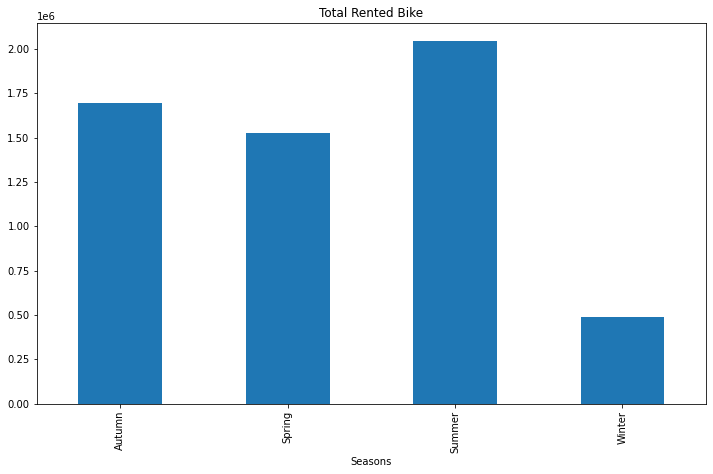

In [32]:
 #creating plot
 plt.figure(figsize= (12,7))
 plt.title("Total Rented Bike")
 Bike_df_copy.groupby('Seasons')['Rented Bike Count'].sum().plot.bar() #pie(autopct='%1.1f%%', shadow=True, startangle=0)

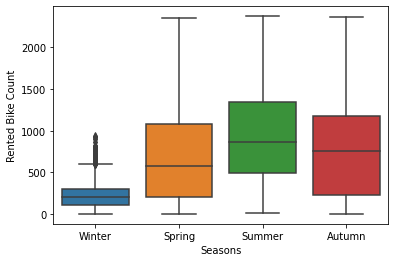

In [33]:
sns.boxplot(x=Bike_df_copy["Seasons"],y=Bike_df_copy['Rented Bike Count'])
plt.show()
  

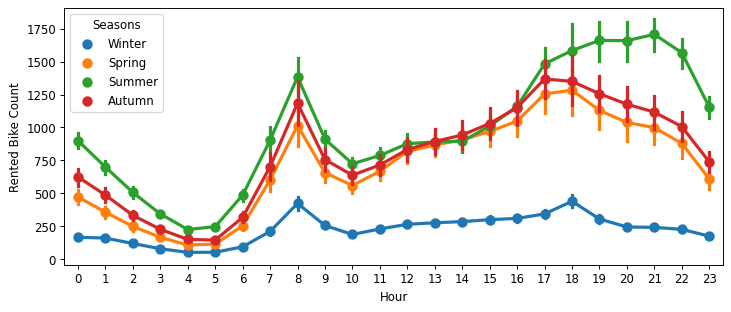

In [34]:
plt.figure(figsize=(10,4), dpi=85)
sns.pointplot(data=Bike_df_copy, x="Hour", y="Rented Bike Count", 
              hue="Seasons")

**insights**

*   As we can see from above point chart that demand of bike is very less during winter season ,i think this is becuase of very less tempreture during winter. and on other seasons demand of bike is not exactly same but higher.

*   Demand of bike is highst during summer due to less rainfall and snowfall people prefer renting bikes to travel



####How demand of bike change when there is holiday.

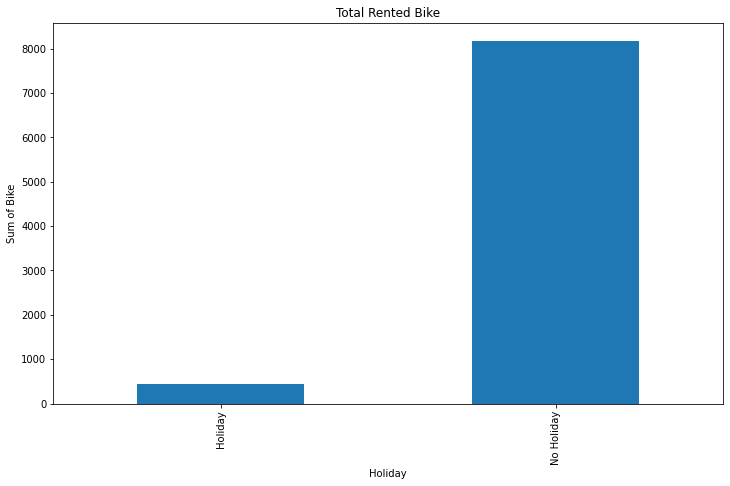

In [35]:
 #creating plot
 plt.figure(figsize= (12,7))
 plt.title("Total Rented Bike")
 plt.xlabel('Seasons')
 plt.ylabel("Sum of Bike")
 Bike_df_copy.groupby('Holiday')['Rented Bike Count'].count().plot.bar()

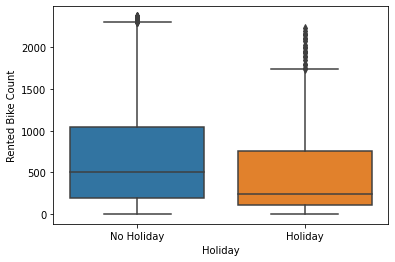

In [36]:
sns.boxplot(x=Bike_df_copy["Holiday"],y=Bike_df_copy['Rented Bike Count'])
plt.show()

In [37]:
Bike_df_copy["Holiday"].value_counts()

No Holiday    8171
Holiday        431
Name: Holiday, dtype: int64

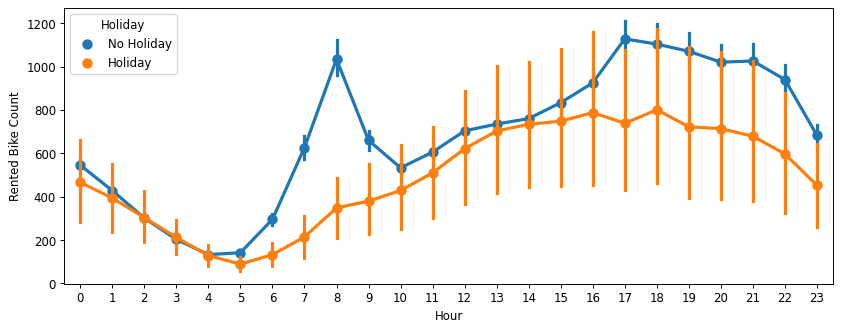

In [38]:
plt.figure(figsize=(10,4), dpi=85)
sns.pointplot(data=Bike_df_copy, x="Hour", y="Rented Bike Count", hue='Holiday')
plt.tight_layout()

**insights**

*   From the above charts we can say that when there is no holiday demand of bike is very high and when there is holiday demand of bike is very less ,i think it's becuase during holiday people don't travel for either to office or to any work
*   Its obvious that on holidays people temnd to take rest so demand of bike on 
holidays are low 

####How demand of bike change with Functioning days

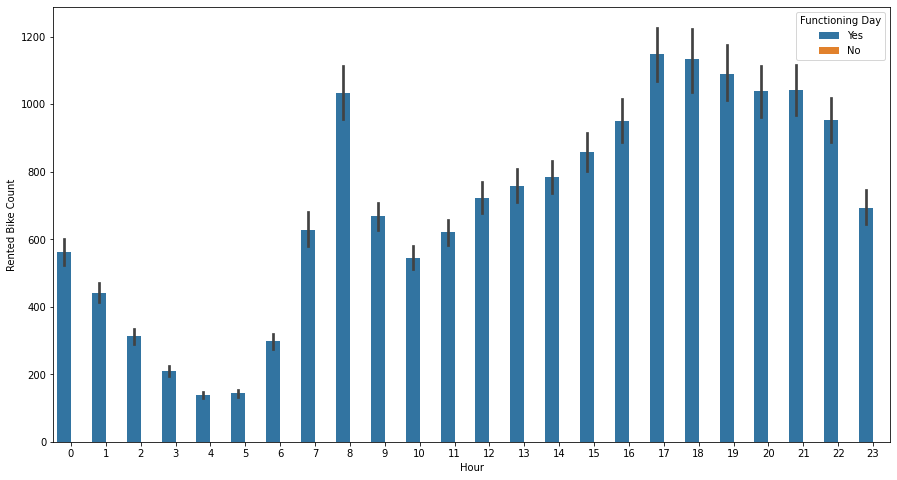

In [39]:
 plt.figure(figsize =(15,8))
 sns.barplot(x='Hour',y='Rented Bike Count',hue='Functioning Day',data=Bike_df_copy);

In [40]:
Bike_df_copy['Functioning Day'].value_counts()

Yes    8307
No      295
Name: Functioning Day, dtype: int64

**insights**

1.   From above bar graph we get to know that there was no bike rent on
non functioning day




## Yearly trend (Bike demand increasing over year or not) 

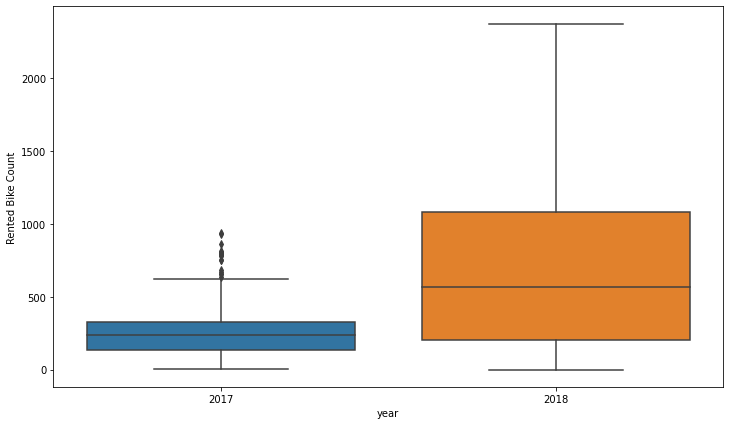

In [41]:
 #creating plot
plt.figure(figsize= (12,7))
sns.boxplot(data=Bike_df_copy,x='year',y='Rented Bike Count')

**Insights**


*   It's interesting right, the demand of bike drastically increasing with year,i think it is because of:-
*   1.due to high traffic in city travalling through bike is easier.

*   2.cost effective


## Monthly Trends

In [42]:
#creating a function 
Month_list=['January','February','March','April','May','June','July','August','September','October','November','December']
def return_month(integer):
  '''This function take integer as input and return
  corresponding month name 
  '''
  return Month_list[integer-1]

In [43]:
#creating month name column in dataframe
Bike_df_copy['Month_name']=Bike_df_copy['month'].apply(return_month)

In [44]:
Bike_df_copy['Month_name'].value_counts().sort_values(ascending= False)

January      741
March        738
August       734
December     734
July         732
October      731
May          719
November     715
September    709
April        703
June         675
February     671
Name: Month_name, dtype: int64

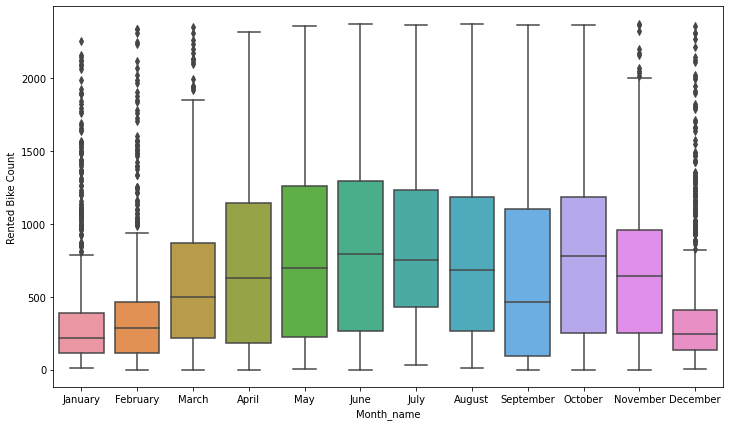

In [45]:
 #creating plot
plt.figure(figsize= (12,7))
sns.boxplot(data=Bike_df_copy,x='Month_name',y='Rented Bike Count')

In [46]:
#dropping month_name column
Bike_df_copy.drop('Month_name',axis=1,inplace=True)

**Insights**

*   We see that number of Ride Count drastically increases between April to June which are comparatively Summer Season
*   From the above boxplot we can say that at starting and ending of year demand of bike decrease(bceause of winter season),apart of these month demand of bike in other month is equal.



## Weekdays Trends

In our dataframe we have date columns using date we can find out it is weekend or weekdays

In [47]:
Bike_df_copy.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'day', 'month', 'year', 'name_of_day'],
      dtype='object')

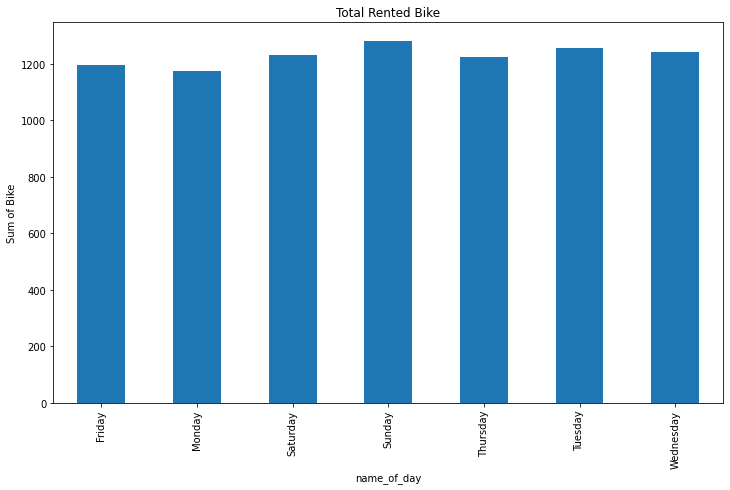

In [48]:
 #creating plot
 plt.figure(figsize= (12,7))
 plt.title("Total Rented Bike")
 plt.xlabel('name_of_day')
 plt.ylabel("Sum of Bike")
 Bike_df_copy.groupby('name_of_day')['Rented Bike Count'].count().plot.bar()

In [49]:
Bike_df_copy.groupby(['name_of_day'])['Rented Bike Count'].count().sort_values(ascending=False)

name_of_day
Sunday       1282
Tuesday      1257
Wednesday    1241
Saturday     1230
Thursday     1223
Friday       1196
Monday       1173
Name: Rented Bike Count, dtype: int64

Almost same demand on everyday of the week

## Creating Functions

In [50]:
#creating function
def return_days(str_):
  '''
  This function return days as input and return bins based on required bike count
  '''
  if str_=='Sunday'or'Monday'or'Tueday'or'Wednesday'or'Thursday'or'Friday'or'Saturday':
    return 1

In [51]:
Bike_df_copy['name_of_day']=Bike_df_copy['name_of_day'].apply(return_days)

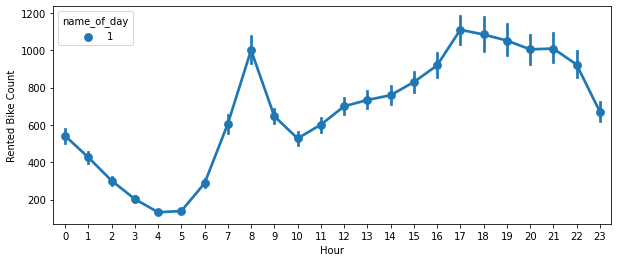

In [52]:
plt.figure(figsize = (10,4))
sns.pointplot(data=Bike_df_copy, x="Hour", y="Rented Bike Count", hue='name_of_day')

In [53]:
Bike_df_copy.drop('name_of_day',axis=1,inplace=True)

No meaning full insight found , demand of bike is almost same throughout the week

## Day Trend (Number of bikes required on each day of month)

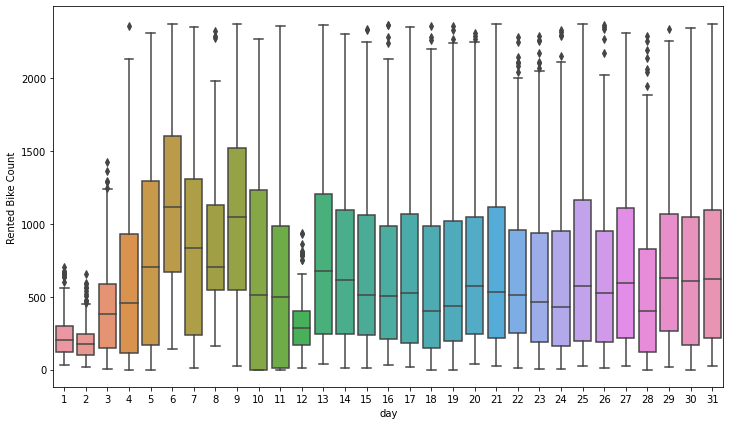

In [54]:
#creating plot
plt.figure(figsize= (12,7))
sns.boxplot(data=Bike_df_copy,x='day',y='Rented Bike Count')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


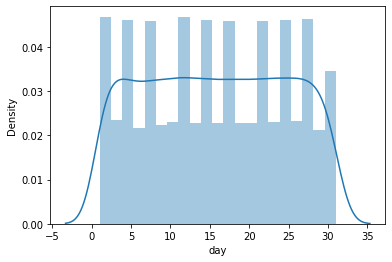

In [55]:
sns.distplot(Bike_df_copy['day'])

**Insights**


*   On the day of each month demand of bike is not exactly but uniform, so from above boxplot we can say that demand of bike changes with seasons,holiday,weather condition but not with day.
*   So let's remove day column from dataframe because demand of bike not changing much on particular day of month.



In [56]:
#removing day column
Bike_df_copy.drop('day',axis=1,inplace=True)

## Hourly Trend (Number of bikes required at each hour of the day)

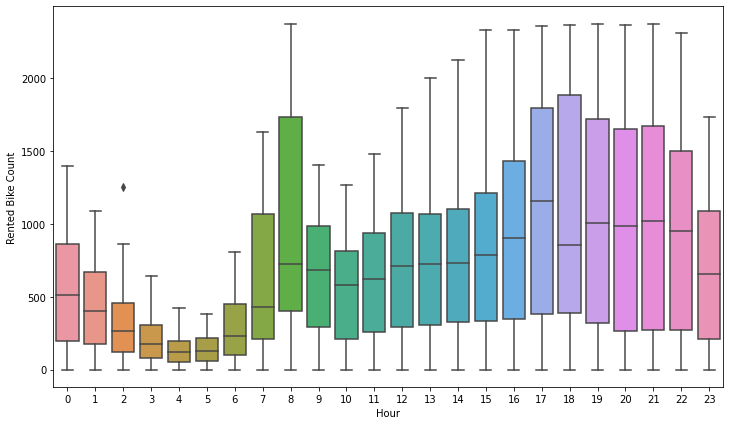

In [57]:
#creating plot 
plt.figure(figsize= (12,7))
sns.boxplot(data=Bike_df_copy,x='Hour',y='Rented Bike Count')

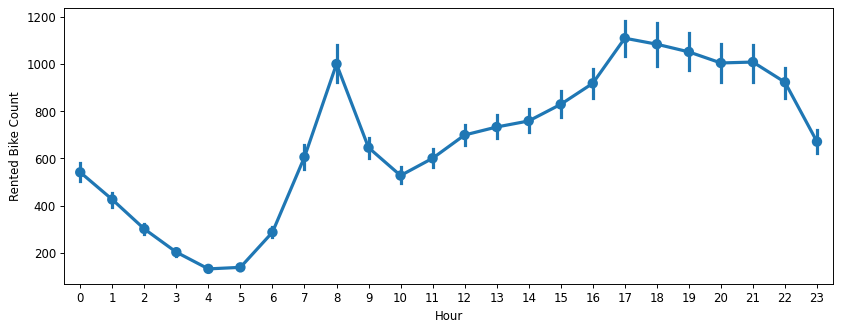

In [58]:
plt.figure(figsize=(10,4), dpi=85)
sns.pointplot(data=Bike_df_copy, x="Hour", y="Rented Bike Count")
plt.tight_layout()

**insights**

*  Possible reason might be that demond is high from 7-10 and from 15-19 IST this is because in most of the metropoliton cities this is the peak office time and more people would be renting bikes ,this is just another possible reason

*   From the above line plot we can say that in early morning from 5 AM to 8 AM ,there is increasing trend in required number of bikes. i think this is because many people travel through buses and train and they reach in there city in early morning as most people preffered travling during nights, also there is increasing trend in required bike in morning from 10 AM to 6PM evening ,i think this is because of office timimg or work timing ,so many people reach to there office or work location by bike.

##Number of bike(bike trend) at different-different wheather condition:-


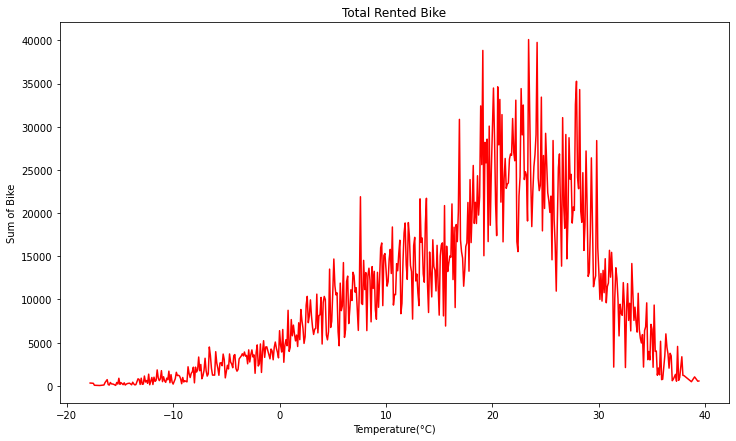

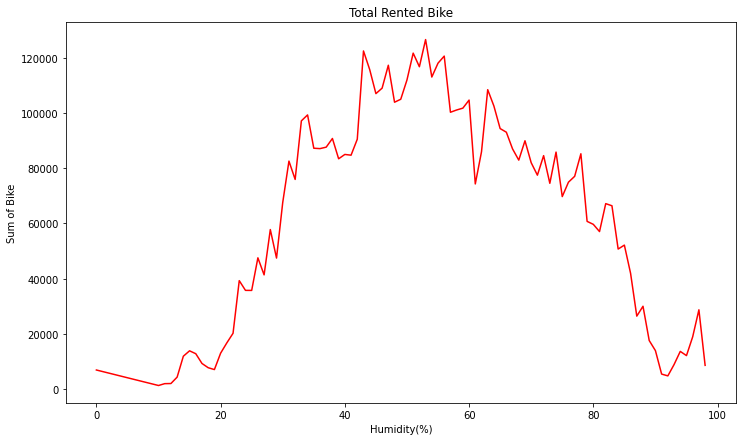

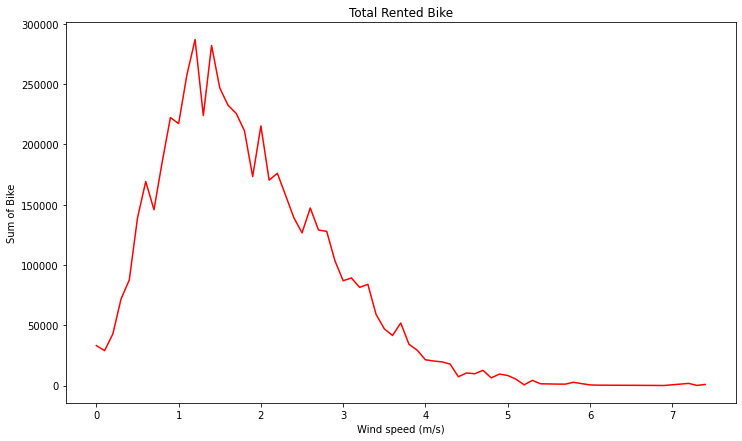

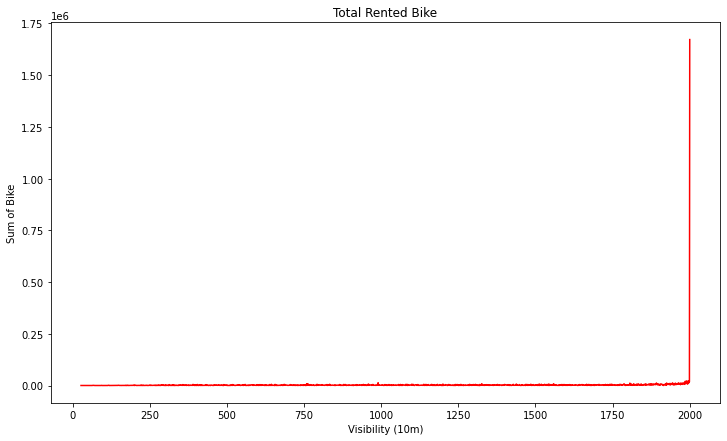

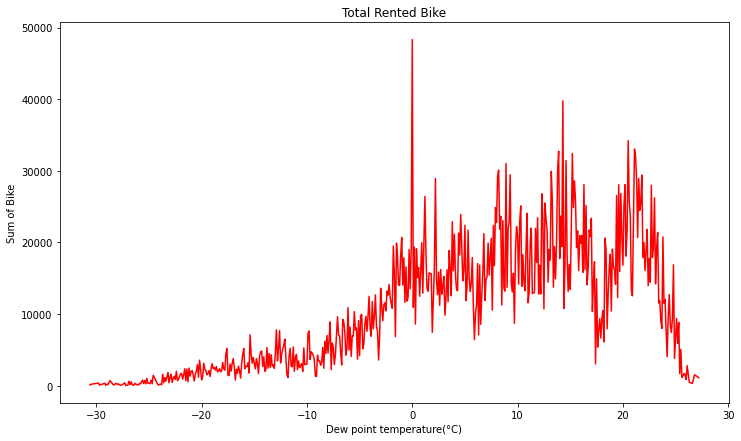

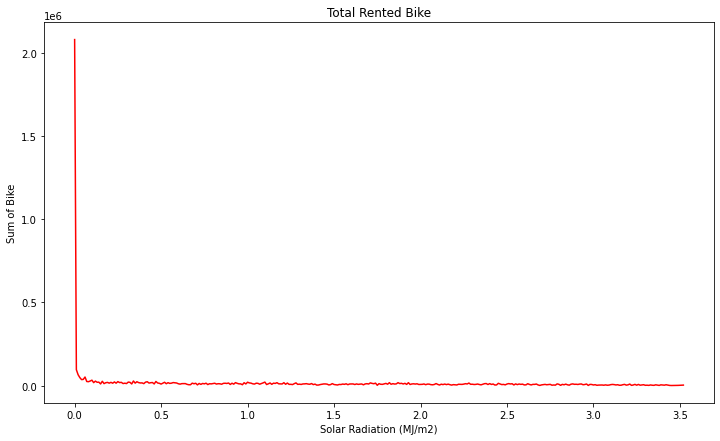

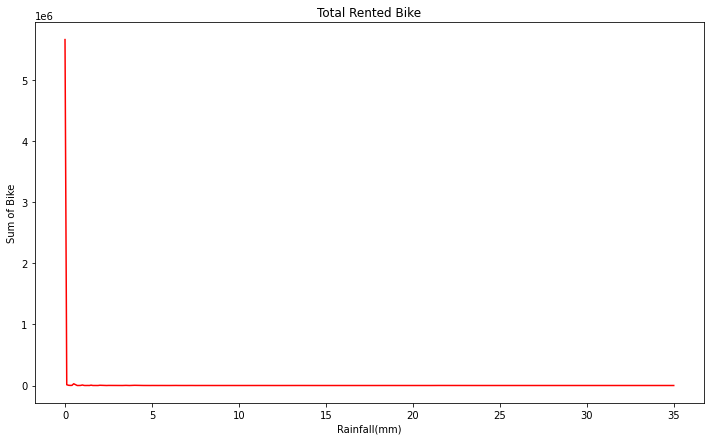

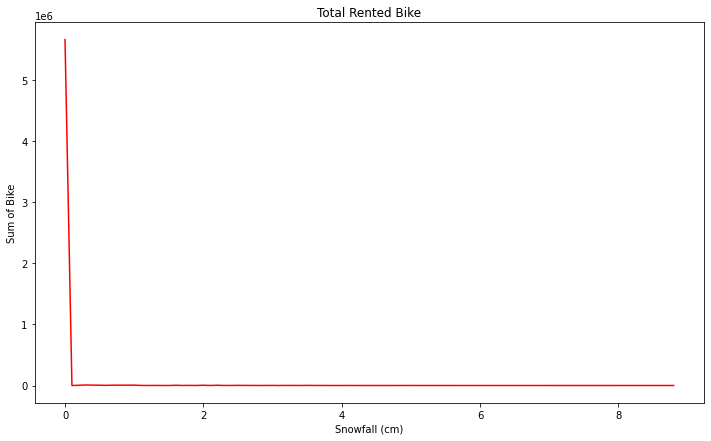

In [59]:
whethr_clmns=['Temperature(°C)', 'Humidity(%)','Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)','Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
for col in whethr_clmns:
 plt.figure(figsize= (12,7))
 plt.title("Total Rented Bike")
 plt.xlabel(col)
 plt.ylabel("Sum of Bike")
 Bike_df_copy.groupby(col)['Rented Bike Count'].sum().plot(color='r')

**Insights**


*   As we can seen from above garph that at lower and higher tempreture required number of bike is less,same trend with humidity 

*   when wind speed is higher ,number of required bike is less. we think these are very basic things because of health concern. during high/low tempreture and high wind speed people not preffer bike for travalling from one place to other place.
*   Also during rainfall,snowfall,less visibility required bike is very less ,it's obvious, right.as we always concerned about our health and safety so during rainfall ,snowfall, solar radiation, no body prefer bike for travalling






# Feature Engineering

## Label Encoding

### Seasons

In [60]:
#creating dummy variable for categorical columns
feature_list=['Seasons']
for col in feature_list:
  Bike_df_copy = pd.get_dummies(data= Bike_df_copy,columns =[col], drop_first=False)

In [61]:
Bike_df_copy.head(2)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,month,year,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,1,2017,0,0,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,1,2017,0,0,0,1


### Years

"Yearly Trend" analysis we have seen that demand of bike incresing over year,in our dataset we have two year (2017,2018),

So let's assign weightage to year, because bike demand increasing over year so we will assign lower year with low weightage and higher year with high weightage

In yearly weightage we will be creat bins based on quartely  

In [63]:
#creating function
def year_weightage(month,year):
  '''
  This funtion take year as input and return weightage of year
  '''
  if (year==2017) and (month<=3):
    return 1
  elif (year==2017) and (month>3) and (month<=6):
    return 2
  elif (year==2017) and (month>6) and (month<=9):
    return 3
  elif (year==2017) and (month>9) and (month<=12):
    return 4
  elif (year==2018) and (month<=3):
    return 5
  elif (year==2018) and (month>3) and (month<=6):
    return 6
  elif (year==2018) and (month>6) and (month<=9):
    return 7
  else:
    return 8

In [64]:
#creating year weightage new column
Bike_df_copy['month_year_bins']=Bike_df_copy.apply(lambda x:year_weightage(x.month,x.year),axis=1)

In [65]:
#dropping year column
Bike_df_copy.drop('year',axis=1,inplace=True)
Bike_df_copy.drop('month',axis=1,inplace=True)

### Hour Label Encoding

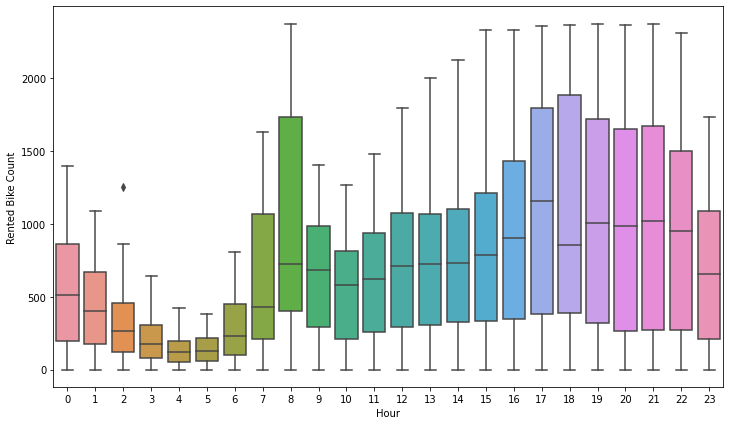

In [66]:
#creating plot 
plt.figure(figsize= (12,7))
sns.boxplot(data=Bike_df_copy,x='Hour',y='Rented Bike Count')

As we can seen from above box plot that number of required bike count changes with different-different hours, In some hours required bike are less and in some hours required bike count are larger , based on how number of bike varies with hours we will creat some bins ,when number of bike required is high we will assign higher weightage to that hours and when number of bike required is less we assign less weightage to that particular hours.

In [67]:
#creating function
def return_hour_bin(inte):
  '''
  This function return hours as input and return bins based on required bike count
  '''
  if inte==18:
    return 8
  elif inte==8 or inte==17 or inte==19:
    return 7
  elif inte==20 or inte==21:
    return 6
  elif inte==22 or inte==16:
    return 5
  elif inte==0 or inte==10 or inte==11:
    return 3
  elif inte==1 or inte==2 or inte==6:
    return 2
  elif inte==3 or inte==4 or inte==5:
    return 1
  else:
    return 4

In [68]:
#creating  new column
Bike_df_copy['Hour_bins']=Bike_df_copy['Hour'].apply(return_hour_bin)

In [69]:
#dropping hour column
Bike_df_copy.drop('Hour',axis=1,inplace=True)

## One Hot Encoding

### Holiday

In our dataframe we have 3 features "Season" , "Functioning Days" and "Holiday" which contain categorical values , we know that to fit data to our machine learning model we need all numerical features,so let's creat dummies for these 3 columns.

In [70]:
#creting function of One hot encoding of holiday columns
def return_encode(str_):
  '''
  This function return 1 if there is No holiday and return 0 if there is holiday
  '''
  if str_=='No Holiday':
    return 1
  else:
    return 0

In [71]:
#One Hot encoding for Holiday column
Bike_df_copy['Holiday']=Bike_df_copy['Holiday'].apply(return_encode)

### Funtioning Days

In [72]:
#creting function of One hot encoding of Funtion Days columns
def return_encode(str_):
  '''
  This function return 1 if  Functioning Day=Yes and return 0 if  Functioning Day=NO
  '''
  if str_=='Yes':
    return 1
  else:
    return 0

In [73]:
#One Hot encoding for Funtion Days column
Bike_df_copy['Functioning Day']=Bike_df_copy['Functioning Day'].apply(return_encode)

In [74]:
Bike_df_copy['Functioning Day'].value_counts()

1    8307
0     295
Name: Functioning Day, dtype: int64

# New